In [25]:
#### import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stud.csv')
df.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [3]:
### create dependent and independent features
X = df.drop(['math score', 'Unnamed: 0'], axis=1)
y = df['math score']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   gender                       1000 non-null   object 
 2   race/ethnicity               1000 non-null   object 
 3   parental level of education  1000 non-null   object 
 4   lunch                        1000 non-null   object 
 5   test preparation course      1000 non-null   object 
 6   math score                   1000 non-null   int64  
 7   reading score                1000 non-null   int64  
 8   writing score                1000 non-null   int64  
 9   Total_Score                  1000 non-null   int64  
 10  Average_score                1000 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [5]:
print("the unique categories in gender :", X['gender'].unique())
print("the unique categories in race/ethnicity :", X['race/ethnicity'].unique())
print("the unique categories in parental level of education :", X['parental level of education'].unique())
print("the unique categories in lunch :", X['lunch'].unique())
print("the unique categories in test preparation course :", X['test preparation course'].unique())


the unique categories in gender : ['female' 'male']
the unique categories in race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
the unique categories in parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
the unique categories in lunch : ['standard' 'free/reduced']
the unique categories in test preparation course : ['none' 'completed']


In [6]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=10)
X_train.shape, X_test.shape

((750, 9), (250, 9))

In [7]:
from sklearn.compose import ColumnTransformer
num_features = [col for col in X.columns if X[col].dtype != object]
cat_features = [col for col in X.columns if X[col].dtype == object]

oh_transformer = OneHotEncoder()
scaler_transformer = StandardScaler()

preprocessor = ColumnTransformer([('one hot', oh_transformer, cat_features),('scaler', scaler_transformer, num_features)])
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [8]:
X_train

array([[ 0.        ,  1.        ,  0.        , ..., -1.24744859,
        -1.13666508, -1.13666508],
       [ 1.        ,  0.        ,  0.        , ...,  0.71532017,
         0.67405047,  0.67405047],
       [ 0.        ,  1.        ,  0.        , ...,  0.38819204,
         0.76690768,  0.76690768],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.85489484,
        -0.71880765, -0.71880765],
       [ 1.        ,  0.        ,  0.        , ...,  1.17329955,
         1.50976534,  1.50976534],
       [ 0.        ,  1.        ,  0.        , ..., -1.77085359,
        -1.4152367 , -1.4152367 ]])

In [9]:
def evaluate_model(true, predicted):
    r2 = r2_score(true, predicted)
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    return r2, mse, mae, rmse

In [11]:
models = {
            'linear' : LinearRegression(), 'support vector': SVR(), 'KNN' : KNeighborsRegressor(), 'Decision tree' : DecisionTreeRegressor(), 
            'random forest': RandomForestRegressor(), 'catboost': CatBoostRegressor(verbose=0), 'adaboost': AdaBoostRegressor(), 'xgboost': XGBRegressor()
          }
model_names = []
r2_scores = []
for i in list(models.keys()):
    model = models[i]
    model_name = i

    
    

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    r2_train, mse_train, mae_train, rmse_train = evaluate_model(y_train, y_pred_train)
    r2, mse, mae, rmse = evaluate_model(y_test, y_pred)
    
    model_names.append(i)
    r2_scores.append(r2)
    
    print(f'Evaluation for {model_name} model')
    print(f'r2 score for training data', r2_train)
    print(f'mean squared error for training data', mse_train)
    print(f'root mean squared error for training data', rmse_train)
    print(f'mean absolute error for training data', mae_train)
    print('-'*50)

    print(f'Evaluation for {model_name} model')
    print(f'r2 score for test data', r2)
    print(f'mean squared error for test data', mse)
    print(f'root mean squared error for test data', rmse)
    print(f'mean absolute error for test data', mae)
    print('='*50)
    print()

Evaluation for linear model
r2 score for training data 1.0
mean squared error for training data 2.6055549792179873e-27
root mean squared error for training data 5.10446371249516e-14
mean absolute error for training data 4.023092969873687e-14
--------------------------------------------------
Evaluation for linear model
r2 score for test data 1.0
mean squared error for test data 2.6043769469328573e-27
root mean squared error for test data 5.10330965838137e-14
mean absolute error for test data 4.122568952880101e-14

Evaluation for support vector model
r2 score for training data 0.8584014945861914
mean squared error for training data 33.60568178578068
root mean squared error for training data 5.797040778343782
mean absolute error for training data 3.698567289853123
--------------------------------------------------
Evaluation for support vector model
r2 score for test data 0.8886649057430026
mean squared error for test data 22.835538595351906
root mean squared error for test data 4.778654

In [14]:
scores = pd.DataFrame(list(zip(model_names, r2_scores)), columns = ['model_names', 'r2_scores']).sort_values(by ='r2_scores', ascending=False)
scores

,model_names,r2_scores
0,linear,1.000000
7,xgboost,0.972966
5,catboost,0.967677
4,random forest,0.960517
3,Decision tree,0.926302
6,adaboost,0.898873
1,support vector,0.888665
2,KNN,0.877547


In [ ]:
##Linear mode has the best test accuracy so we select it for further prediction.

In [15]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"the r2 score for Linear Regression model is {score:.4f}")

the r2 score for Linear Regression model is 1.0000


In [17]:
prediction = pd.DataFrame({'Actual value': y_test, 'Predicted': y_pred, 'difference': y_test - y_pred})
prediction

,Actual value,Predicted,difference
841,64,64.0,2.131628e-14
956,84,84.0,-8.526513e-14
544,64,64.0,2.842171e-14
173,63,63.0,-2.842171e-14
759,69,69.0,0.000000e+00
...,...,...,...
800,67,67.0,-1.421085e-14
217,34,34.0,7.105427e-14
565,48,48.0,7.105427e-14
486,61,61.0,7.105427e-14


Text(0, 0.5, 'predicted')

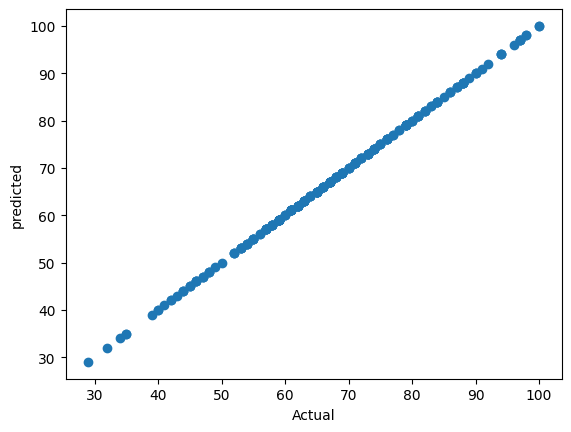

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

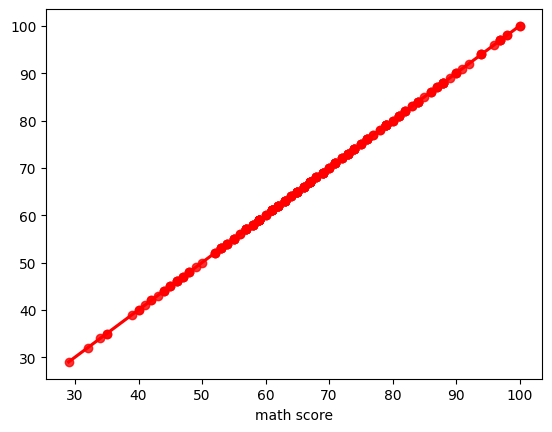

In [ ]:
sns.regplot(x=y_test,y=y_pred,color ='red');